# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diamonds = pd.read_csv(r'C:/Users/paul/Documents/Formation Data Analyst/Bootcamp/Module 2/Project_Week_4/diamonds_cleaned.csv')
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,2.43,2.43,1,5
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,2.31,2.31,2,5
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,2.31,2.31,4,5
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,2.63,2.63,3,1
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,2.75,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,3.50,3.50,2,6
53936,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,3.61,3.61,2,6
53937,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,3.56,3.56,2,6
53938,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,3.74,3.74,1,2


In [5]:
diamonds.drop(diamonds.columns[0], axis=1, inplace=True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,2.43,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,2.31,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,2.31,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,2.63,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,2.75,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,3.50,3.50,2,6
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,3.61,3.61,2,6
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,3.56,3.56,2,6
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,3.74,3.74,1,2


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_score,color_score
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,3.539249,3.539707,3.051020,3.405803
std,0.474011,1.432621,2.234491,3989.439738,1.121761,0.693209,0.692075,1.647136,1.701105
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,2.910000,2.910000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,3.530000,3.530000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,4.040000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,8.090000,8.060000,7.000000,6.000000


In [ ]:
## To complete

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
## I suppose the carat will affect the price the most

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [15]:
diamonds.pivot_table(index=['carat', 'clarity_score','color_score','cut'], values=["price"], aggfunc=np.mean).tail(10)
diamonds.groupby("color").agg("mean")

,carat,depth,table,price,x,y,z,clarity_score,color_score
color,,,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417051,3.342827,3.343320,2.691513,6.0
E,0.657867,61.662090,57.491201,3076.752475,5.411580,3.337770,3.337767,2.969889,5.0
F,0.736538,61.694582,57.433536,3724.886397,5.614961,3.465062,3.465788,3.133934,4.0
G,0.771190,61.757111,57.288629,3999.135671,5.677543,3.507345,3.507966,3.463425,3.0
H,0.911799,61.836850,57.517811,4486.669196,5.983335,3.698260,3.699147,2.933646,2.0
I,1.026927,61.846385,57.577278,5091.874954,6.222826,3.846368,3.846368,2.964035,1.0
J,1.162137,61.887215,57.812393,5323.818020,6.519338,4.033251,4.033251,2.776353,0.0


**What do you see? Pay special attention to the relationship between price and color.**

In [9]:
pd.pivot_table(diamonds,values='price',index='color')

,price
color,
D,3169.954096
E,3076.752475
F,3724.886397
G,3999.135671
H,4486.669196
I,5091.874954
J,5323.818020


In [ ]:
## Prices are higher for the color that are supposed to be the worst which is strange.
## But this can be explain because the prices are not only based on color but also on carat, cut, sizes...

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

In [1]:
frequency = diamonds['color'].value_counts()
hist_frequency=frequency.plot.bar()
plt.xlabel('color')
plt.ylabel('Frequency')
plt.title('Frequency of the color')

NameError: name 'diamonds' is not defined

In [ ]:
## We have a low number of frequency for the J color. 
## In contrary we have a high freqency for the G color.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [17]:
diamonds.pivot_table(index=['carat', 'clarity_score','color_score','cut'], values=["price"], aggfunc=np.mean).tail(10)
diamonds.groupby("carat").agg("mean")

,depth,table,price,x,y,z,clarity_score,color_score
carat,,,,,,,,
0.20,61.100000,59.333333,365.166667,3.786667,2.303333,2.303333,2.833333,5.166667
0.21,60.511111,58.444444,380.222222,3.874444,2.332222,2.332222,2.666667,5.444444
0.22,61.620000,60.400000,391.400000,3.898000,2.386000,2.386000,2.600000,4.800000
0.23,61.426621,58.034130,486.143345,3.946382,2.431468,2.431468,4.901024,4.518771
0.24,61.599213,57.488189,505.185039,3.990157,2.465591,2.465591,4.972441,4.185039
...,...,...,...,...,...,...,...,...
4.00,63.300000,58.000000,15984.000000,10.010000,6.310000,6.310000,0.000000,1.000000
4.01,61.750000,61.500000,15223.000000,10.080000,6.205000,6.205000,0.000000,0.500000
4.13,64.800000,61.000000,17329.000000,10.000000,6.430000,6.430000,0.000000,2.000000


In [ ]:
## Here the correlation are more logical, the more carat you have:
## - higher are the prices
## - bigger are the sizes (x, y, z)


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

([], [])

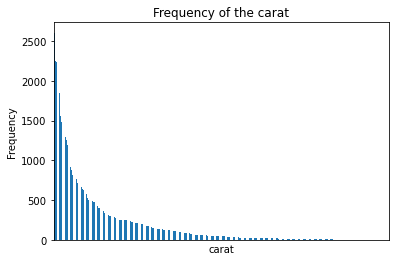

In [20]:
frequency = diamonds['carat'].value_counts()
hist_frequency=frequency.plot.bar()
plt.xlabel('carat')
plt.ylabel('Frequency')
plt.title('Frequency of the carat')
plt.xticks([])

In [21]:
## The diamonds with the less carat are the most frequent

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [22]:
diamonds.pivot_table(index=['carat', 'clarity_score','color_score','cut'], values=["price"], aggfunc=np.mean).tail(10)
diamonds.groupby("table").agg("mean")

,carat,depth,price,x,y,z,clarity_score,color_score
table,,,,,,,,
43.0,1.0400,62.90,4997.0,6.450,4.040,4.040,4.00,1.0
44.0,0.2900,62.80,474.0,4.200,2.650,2.650,4.00,5.0
49.0,0.6500,64.25,2290.5,5.355,3.425,3.425,3.00,3.0
50.0,1.5100,61.50,8995.5,7.380,4.510,4.510,2.00,3.0
50.1,0.9400,66.00,3353.0,6.130,4.060,4.060,1.00,2.0
...,...,...,...,...,...,...,...,...
71.0,0.6800,58.00,1633.0,5.850,3.350,3.350,2.00,3.0
73.0,0.6025,68.90,2406.5,5.520,3.745,3.745,3.25,4.5
76.0,0.7900,65.30,2362.0,5.520,3.350,3.350,2.00,3.0


In [ ]:
## We can't see a real correlation here with other caracteristics 

([], [])

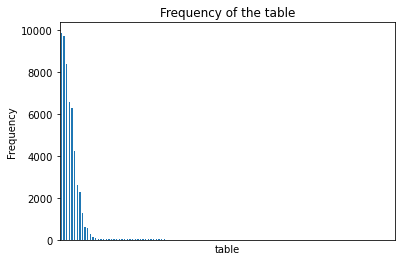

In [27]:
frequency = diamonds['table'].value_counts()
hist_frequency=frequency.plot.bar()
plt.xlabel('table')
plt.ylabel('Frequency')
plt.title('Frequency of the table')
plt.xticks([])

**Finally, do the same with the `clarity` column.**

In [23]:
diamonds.pivot_table(index=['carat', 'clarity_score','color_score','cut'], values=["price"], aggfunc=np.mean).tail(10)
diamonds.groupby("clarity").agg("mean")

,carat,depth,table,price,x,y,z,clarity_score,color_score
clarity,,,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,4.224683,4.224683,0.0,2.968961
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,3.061659,3.061659,7.0,3.101676
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,3.640636,3.640636,2.0,3.448450
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,3.951147,3.952434,1.0,3.469980
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,3.437507,3.437924,4.0,3.161792
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,3.492218,3.492788,3.0,3.494208
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,3.061294,3.062132,6.0,3.351573
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,3.221465,3.221465,5.0,3.569483


Text(0.5, 1.0, 'Frequency of the clarity')

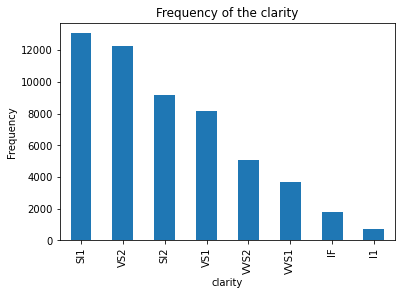

In [28]:
frequency = diamonds['clarity'].value_counts()
hist_frequency=frequency.plot.bar()
plt.xlabel('clarity')
plt.ylabel('Frequency')
plt.title('Frequency of the clarity')

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [30]:
diamonds.corr()

,carat,depth,table,price,x,y,z,clarity_score,color_score
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.973812,0.976188,-0.352841,-0.291437
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,0.095944,0.096379,-0.067384,-0.047279
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.155107,0.155828,-0.160327,-0.026465
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.879332,0.881875,-0.146800,-0.172511
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.990774,0.990749,-0.371999,-0.270287
y,0.973812,0.095944,0.155107,0.879332,0.990774,1.000000,1.000000,-0.375621,-0.274507
z,0.976188,0.096379,0.155828,0.881875,0.990749,1.000000,1.000000,-0.376425,-0.274976
clarity_score,-0.352841,-0.067384,-0.160327,-0.146800,-0.371999,-0.375621,-0.376425,1.000000,-0.025631
color_score,-0.291437,-0.047279,-0.026465,-0.172511,-0.270287,-0.274507,-0.274976,-0.025631,1.000000


In [ ]:
## carat is confirmed to be the most influent criteria on prices but sizes are also very influent.

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


In [ ]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

In [ ]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

In [ ]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [ ]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

**What do you think?**

In [ ]:
#your thoughts here

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.